# L1 : Q3

![](../questoes/q3.png "")

### Fix the notebook path for this project

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

### Imports

In [2]:
import numpy as np
from neuralnetworks.neuralnetwork import NeuralNetwork
from datasets.l1q3 import createDataSetL1Q3A, createDataSetL1Q3B
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error

### Set a random seed

In [3]:
SEED = 42
np.random.seed(seed=SEED)

## A

### Create the dataset

In [4]:
X, y = createDataSetL1Q3A(1000)

### Split into train and test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Lets check some training set rows

In [6]:
print("X: ", X_train[:5], "\n\nY: ", y_train[:5])

X:  [[0, 0], [0, 1], [1, 1], [0, 0], [1, 0]] 

Y:  [[0], [1], [0], [0], [1]]


### Solution: MLP (2 layers)

TRAINING DETAILS:


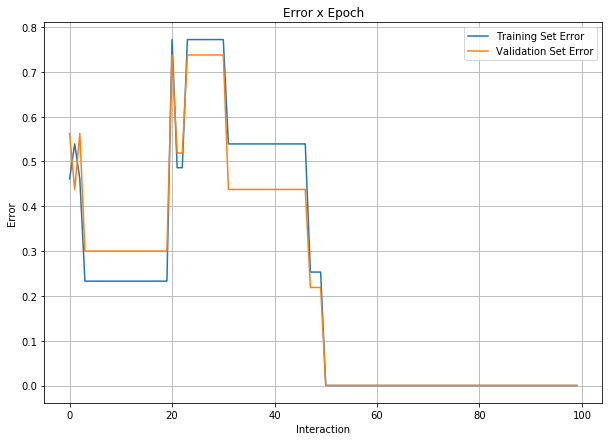

NETWORK STATE AFTER TRAINING:
 {'activation': 'sigmoid',
 'activation_last_layer': 'linear',
 'architecture': [2,
                  1],
 'autoEncode': False,
 'inputs': 2,
 'isClassification': True,
 'layers': [[{'activation': 'sigmoid', 'bias': 0.09759434507666423, 'inputs': 2, 'newBias': 0.09759434507666423, 'newWeights': array([-1.38104156, -1.36710807]), 'weights': array([-1.38104156, -1.36710807])},
             {'activation': 'sigmoid', 'bias': 0.0072259921504710589, 'inputs': 2, 'newBias': 0.0072259921504710589, 'newWeights': array([-4.30506914, -4.33010317]), 'weights': array([-4.30506914, -4.33010317])}],
            [{'activation': 'linear', 'bias': 0.010426464493410595, 'inputs': 2, 'newBias': 0.010426464493410595, 'newWeights': array([ 4.25342875, -4.38015563]), 'weights': array([ 4.25342875, -4.38015563])}]],
 'lr': 0.01,
 'momentum': 0,
 'seed': 42} 

TEST DATASET PREDICTIONS: 
y_test_true:  [0 0 0 1 1 1 0 1 1 0 0 0 0 1 1]  (first 15) 
y_test_pred:  [0 0 0 1 1 1 0 1 1 0 0

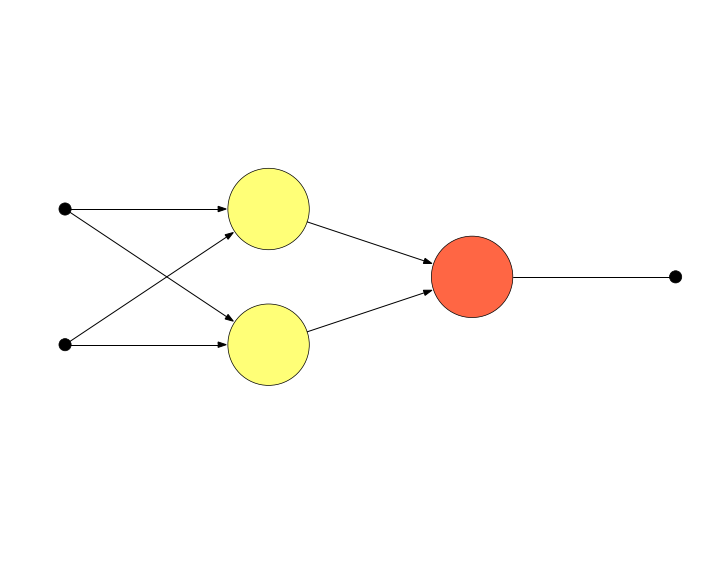

In [7]:
model = NeuralNetwork(2, [2, 1], isClassification=True, lr=0.01, autoEncode=False, activation='sigmoid',
                      activation_last_layer='linear', seed=SEED)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=100, verbose=False, plot=True)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## B

### Create the dataset

In [8]:
X, y = createDataSetL1Q3B(2000)

### Split into train and test dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Lets check some training set rows

In [10]:
print("X: ", X_train[:5], "\n\nY: ", y_train[:5])

X:  [[1.402325111225233], [0.9062593368360766], [1.428411163490259], [0.39757230508119806], [2.4264415547052485]] 

Y:  [[-0.21638427867647475], [0.10194824371743715], [-0.21722981381466175], [0.75953906051390341], [0.1276965880995943]]


### Solution: MLP (2 layers)

TRAINING DETAILS:


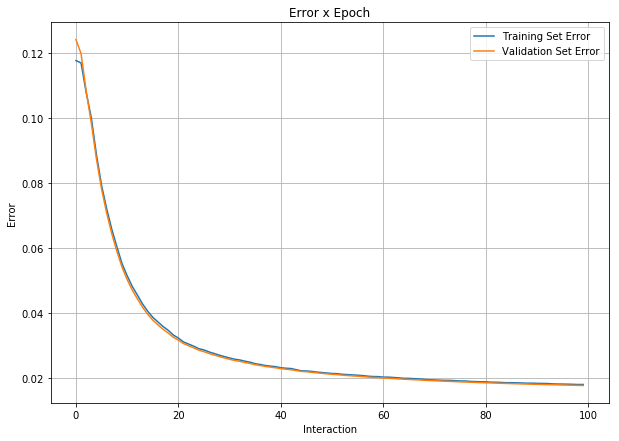

NETWORK STATE AFTER TRAINING:
 {'activation': 'sigmoid',
 'activation_last_layer': 'linear',
 'architecture': [2,
                  1],
 'autoEncode': False,
 'inputs': 1,
 'isClassification': False,
 'layers': [[{'activation': 'sigmoid', 'bias': 0.049524091123221259, 'inputs': 1, 'newBias': 0.049524091123221259, 'newWeights': array([-2.62572518]), 'weights': array([-2.62572518])},
             {'activation': 'sigmoid', 'bias': 0.076995429353163225, 'inputs': 1, 'newBias': 0.076995429353163225, 'newWeights': array([-1.60943142]), 'weights': array([-1.60943142])}],
            [{'activation': 'linear', 'bias': 0.090114555756627454, 'inputs': 2, 'newBias': 0.090114555756627454, 'newWeights': array([ 4.24040735, -1.79105796]), 'weights': array([ 4.24040735, -1.79105796])}]],
 'lr': 0.01,
 'momentum': 0,
 'seed': 42} 

TEST DATASET PREDICTIONS: 
y_test_true:  [ 0.08768552  0.03021136 -0.0962045  -0.07203228  0.00467148  0.18435396
 -0.19146772 -0.20883053 -0.04348367  0.00359824  0.8702891

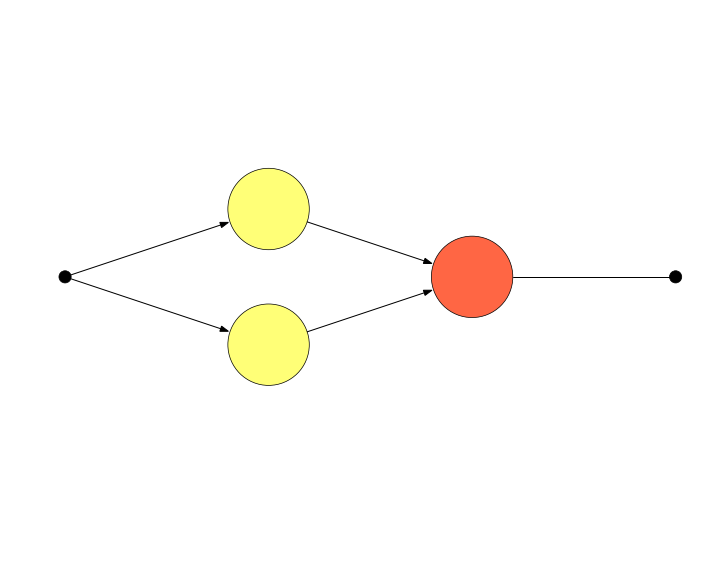

In [11]:
model = NeuralNetwork(1, [2, 1], isClassification=False, lr=0.01, autoEncode=False, activation='sigmoid',
                      activation_last_layer='linear', seed=SEED)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=100, verbose=False, plot=True)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))
y_train_true = np.reshape(y_train, (len(y_train)))
y_train_pred = np.reshape(model.predict(X_train), (len(X_train)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("MSE TRAINING DATASET:\n", mean_absolute_error(y_train_true, y_train_pred), "\n")
print("MSE TEST DATASET:\n", mean_absolute_error(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))